In [1]:
import zipfile
import os
from collections import namedtuple

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans

from JicBitstream import JicBitstream, JicBitstreamZip

%matplotlib notebook

In [2]:
def compare(lst, fn0, fn1, path="../../results/out/"):
    print(f"comparing {os.path.basename(fn0)} and {os.path.basename(fn1)}")
    fn0 = os.path.join(path, fn0)
    fn1 = os.path.join(path, fn1)
    jic0 = JicBitstreamZip(fn0)
    jic1 = JicBitstreamZip(fn1)
    diff = jic0.diff_pos(jic1)
    print(diff)
    lst.append(diff)

In [3]:
diff_lst = []
pin = "N32"

# cur strength changes
compare(diff_lst, f"{pin}_2V5_16mA_pu_off_dly_no.zip", f"{pin}_2V5_16mA_pu_on_dly_no.zip")
compare(diff_lst, f"{pin}_2V5_12mA_pu_off_dly_no.zip", f"{pin}_2V5_12mA_pu_on_dly_no.zip")
compare(diff_lst, f"{pin}_2V5_8mA_pu_off_dly_no.zip", f"{pin}_2V5_8mA_pu_on_dly_no.zip")
compare(diff_lst, f"{pin}_2V5_4mA_pu_off_dly_no.zip", f"{pin}_2V5_4mA_pu_on_dly_no.zip")

None

comparing N32_2V5_16mA_pu_off_dly_no.zip and N32_2V5_16mA_pu_on_dly_no.zip
(array([     2743,      2775,      2807,      2839,      2871,      3648,
            3651,      3654,      3655,      3659,      3660,      3663,
         1110701,   1117825,   1117830,   1117831,   1117834,   1117835,
         1117836,   1117838, 268437277, 268437278, 268437280, 268437281,
       268437286, 268437287]),)
comparing N32_2V5_12mA_pu_off_dly_no.zip and N32_2V5_12mA_pu_on_dly_no.zip
(array([     2743,      3648,      3650,      3653,      3654,      3657,
            3658,      3659,      3660,      3662,   1110701,   1117825,
         1117830,   1117831,   1117834,   1117835,   1117836,   1117838,
       268437276, 268437277, 268437279, 268437281, 268437282, 268437283,
       268437285, 268437286]),)
comparing N32_2V5_8mA_pu_off_dly_no.zip and N32_2V5_8mA_pu_on_dly_no.zip
(array([     2743,      3648,      3650,      3653,      3654,      3657,
            3658,      3659,      3660,      3662,   

In [4]:
diff_lst_comb = list()

for diff in diff_lst:
    for el in diff[0]:
        diff_lst_comb.append(el)

diff_lst_comb = np.array(sorted(list(set(diff_lst_comb))))

X = diff_lst_comb.reshape(-1, 1)

In [5]:
kmeans = KMeans(n_clusters=3, random_state=123).fit(X)
print("K-means cluster centers\n", kmeans.cluster_centers_)

K-means cluster centers
 [[2.68437285e+08]
 [3.65400000e+03]
 [1.11782500e+06]]


In [6]:
APPROX_PIN_LOC = int(1e6)
PIN_GROUP = kmeans.predict(np.array([APPROX_PIN_LOC]).reshape(1, -1))
feat_addrs = X[kmeans.labels_ == PIN_GROUP].reshape((-1))

In [7]:
jic_path="../../results/out/"

jics = [
    f"{pin}_2V5_16mA_pu_off_dly_no.zip",
    f"{pin}_2V5_16mA_pu_on_dly_no.zip",
    f"{pin}_2V5_12mA_pu_off_dly_no.zip",
    f"{pin}_2V5_12mA_pu_on_dly_no.zip",
    f"{pin}_2V5_8mA_pu_off_dly_no.zip",
    f"{pin}_2V5_8mA_pu_on_dly_no.zip",
    f"{pin}_2V5_4mA_pu_off_dly_no.zip",
    f"{pin}_2V5_4mA_pu_on_dly_no.zip",
]
    
for jic in jics:
    j = JicBitstreamZip(os.path.join(jic_path, jic))
    feat = j.get_els(feat_addrs).astype(int)
    print(f"{jic.replace('.zip', ''):28}", end=" ")
    print(feat)


N32_2V5_16mA_pu_off_dly_no   [0 1 0 0 1 0 1 1]
N32_2V5_16mA_pu_on_dly_no    [1 0 1 1 0 1 0 0]
N32_2V5_12mA_pu_off_dly_no   [0 0 0 0 0 1 0 0]
N32_2V5_12mA_pu_on_dly_no    [1 1 1 1 1 0 1 1]
N32_2V5_8mA_pu_off_dly_no    [0 1 0 1 1 0 0 0]
N32_2V5_8mA_pu_on_dly_no     [1 0 1 0 0 1 1 1]
N32_2V5_4mA_pu_off_dly_no    [0 0 0 0 0 1 0 0]
N32_2V5_4mA_pu_on_dly_no     [1 1 1 1 1 0 1 1]


<IPython.core.display.Javascript object>


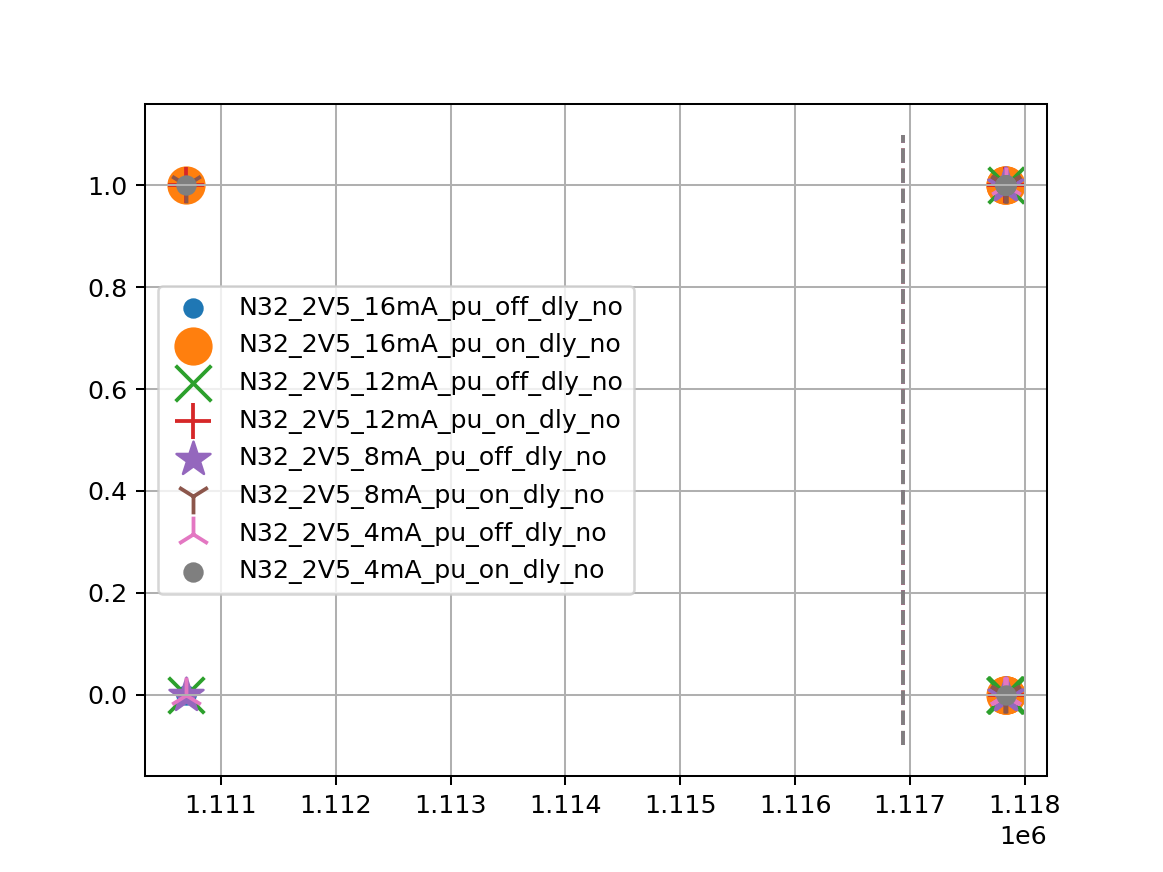

<IPython.core.display.Javascript object>


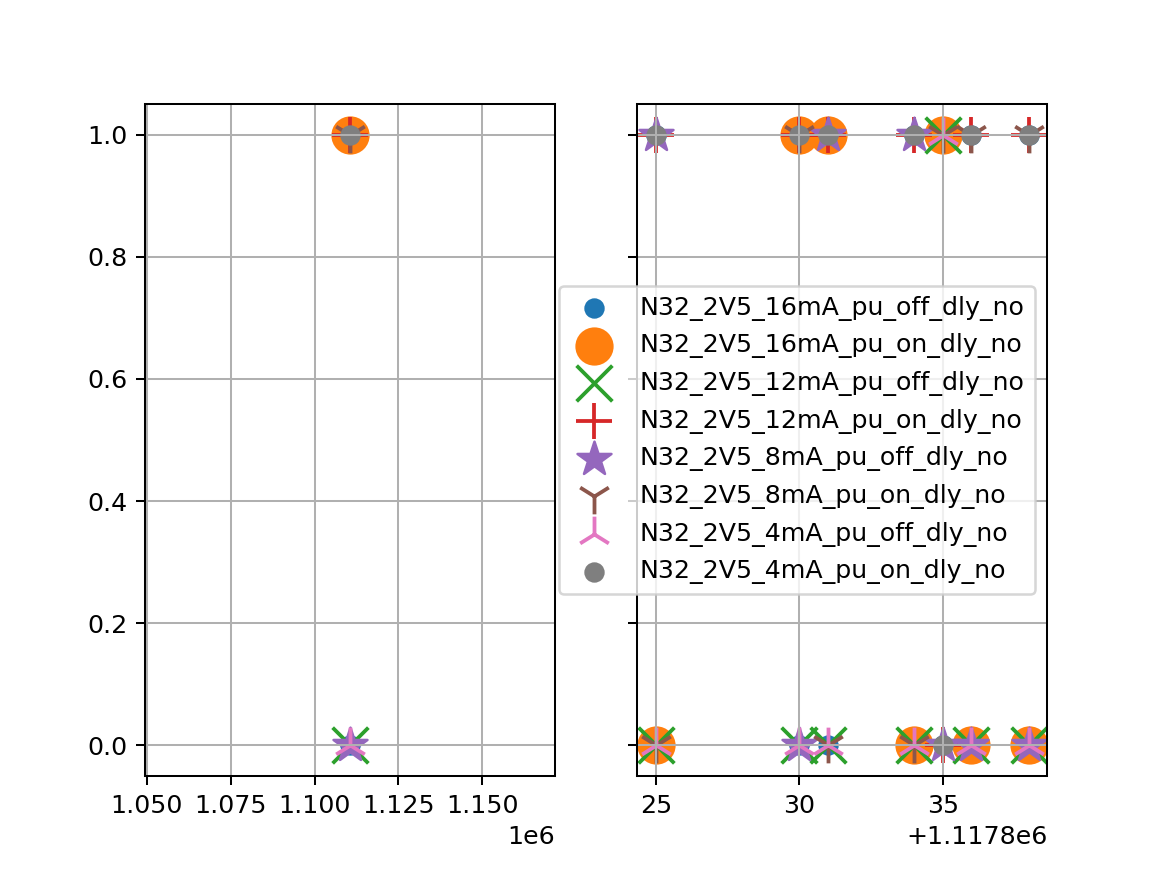

In [8]:

feat_addrs1 = feat_addrs[feat_addrs < np.mean(feat_addrs)]
feat_addrs2 = feat_addrs[feat_addrs >= np.mean(feat_addrs)]


def MARKERS():
    ms = [".", "o", "x", "+", "*", "1", "2"]
    idx = 0

    while True:
        yield ms[idx]
        idx += 1
        if idx >= len(ms):
            idx = 0

fig, ax = plt.subplots()
markers = MARKERS()

for jic in jics:
    j = JicBitstreamZip(os.path.join(jic_path, jic))
    feat = j.get_els(feat_addrs).astype(int)
    marker = next(markers)
    label = jic.replace(".zip", "")
    ax.scatter(feat_addrs, feat, marker=marker, s=200, label=label)
    ax.plot([np.mean(feat_addrs), np.mean(feat_addrs)], [-0.1, 1.1], '--')
    ax.legend()
    ax.grid(True)


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
markers = MARKERS()

for jic in jics:
    j = JicBitstreamZip(os.path.join(jic_path, jic))
    feat1 = j.get_els(feat_addrs1).astype(int)
    feat2 = j.get_els(feat_addrs2).astype(int)
    marker = next(markers)
    label = jic.replace(".zip", "")
    ax1.scatter(feat_addrs1, feat1, marker=marker, s=200)
    ax2.scatter(feat_addrs2, feat2, marker=marker, s=200, label=label)
    ax2.legend()
    ax1.grid(True)
    ax2.grid(True)

In [9]:
print(feat_addrs1)

for jic in jics:
    j = JicBitstreamZip(os.path.join(jic_path, jic))
    feat1 = j.get_els(feat_addrs1).astype(int)
    print("{:35}".format(jic), feat1)


[1110701]
N32_2V5_16mA_pu_off_dly_no.zip      [0]
N32_2V5_16mA_pu_on_dly_no.zip       [1]
N32_2V5_12mA_pu_off_dly_no.zip      [0]
N32_2V5_12mA_pu_on_dly_no.zip       [1]
N32_2V5_8mA_pu_off_dly_no.zip       [0]
N32_2V5_8mA_pu_on_dly_no.zip        [1]
N32_2V5_4mA_pu_off_dly_no.zip       [0]
N32_2V5_4mA_pu_on_dly_no.zip        [1]
